In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


%matplotlib inline

In [3]:
# data
fashionBIG = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionBIG.csv")
fashionBIG.head()

,age,income,months_subbed,upgrade
0,22,55.89,14,0
1,32,86.03,57,0
2,38,49.22,37,1
3,14,92.71,51,1
4,33,94.06,37,0


In [4]:
predictors = ["age", "income", "months_subbed"]

X_train, X_test, y_train, y_test = train_test_split(fashionBIG[predictors], fashionBIG["upgrade"], test_size=0.2)
X_train.head()

zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [5]:
myLogit = LogisticRegression() #create

In [6]:
myLogit.fit(Xz_train,y_train) #fit

LogisticRegression()

In [7]:
predictedVals = myLogit.predict(Xz_test) #predict

In [8]:
accuracy_score(y_test,predictedVals)

0.57

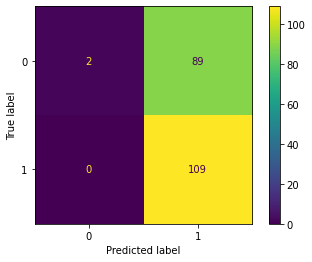

In [9]:
plot_confusion_matrix(myLogit,X_test, y_test)

## Predict new Data

In [10]:
fashionNEW = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionNEW.csv")

Xnew = fashionNEW.iloc[:,0:3]
Xnewz = zscore.transform(Xnew)

In [12]:
Ypred = myLogit.predict(Xnewz)

In [13]:
accuracy_score(fashionNEW["upgrade"], Ypred)

0.597

In [16]:
confusion_matrix(fashionNEW["upgrade"], Ypred)

array([[106, 291],
       [112, 491]])

## LR with Cross Validation

In [ ]:
# Kfold

X = df[["age","income","months_subbed"]]
y = df["upgrade"]

# create k-fold object
kf = KFold(n_splits = 5)
kf.split(X)

lr = LogisticRegression() #create model

acc = [] #create empty list to store accuracy for each fold

In [ ]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    
#print overall acc
print(acc)
np.mean(acc)